## Homework: word embeddings and TSNE

### Below is text about Armenia from wikipedia

In [2]:
wiki_armenia = "Armenia, officially the Republic of Armenia, is a landlocked country located in the Armenian Highlands of Western Asia. It is a part of the Caucasus region; and is bordered by Turkey to the west, Georgia to the north, the Lachin corridor under a Russian peacekeeping force, and Azerbaijan to the east, and Iran and the Azerbaijani exclave of Nakhchivan to the south. Yerevan is the capital and largest city.\nArmenia is a unitary, multi-party, democratic nation-state with an ancient cultural heritage. The first Armenian state of Urartu was established in 860 BC, and by the 6th century BC it was replaced by the Satrapy of Armenia. The Kingdom of Armenia reached its height under Tigranes the Great in the 1st century BC and became the first state in the world to adopt Christianity as its official religion, in 301. The ancient Armenian kingdom was split between the Byzantine and Sasanian Empires around the early 5th century. Under the Bagratuni dynasty, the Bagratid Kingdom of Armenia was restored in the 9th century. Declining due to the wars against the Byzantines, the kingdom fell in 1045 and Armenia was soon after invaded by the Seljuk Turks. An Armenian principality and later a kingdom Cilician Armenia was located on the coast of the Mediterranean Sea between the 11th and 14th centuries.\nBetween the 16th and 19th centuries, the traditional Armenian homeland composed of Eastern Armenia and Western Armenia came under the rule of the Ottoman and Persian empires, repeatedly ruled by either of the two over the centuries. By the 19th century, Eastern Armenia had been conquered by the Russian Empire, while most of the western parts of the traditional Armenian homeland remained under Ottoman rule. During World War I, 1.5 million Armenians living in their ancestral lands in the Ottoman Empire were systematically exterminated in the Armenian genocide. In 1918, following the Russian Revolution, all non-Russian countries declared their independence after the Russian Empire ceased to exist, leading to the establishment of the First Republic of Armenia. By 1920, the state was incorporated into the Transcaucasian Socialist Federative Soviet Republic, and in 1922 became a founding member of the Soviet Union. In 1936, the Transcaucasian state was dissolved, transforming its constituent states, including the Armenian Soviet Socialist Republic, into full Union republics. The modern Republic of Armenia became independent in 1991 during the dissolution of the Soviet Union.\nArmenia is a developing country and ranks 81st on the Human Development Index (2018). Its economy is primarily based on industrial output and mineral extraction. While Armenia is geographically located in the South Caucasus, it is generally considered geopolitically European. Since Armenia aligns itself in many respects geopolitically with Europe, the country is a member of numerous European organizations including the Council of Europe, the Eastern Partnership, Eurocontrol, the Assembly of European Regions, and the European Bank for Reconstruction and Development. Armenia is also a member of certain regional groups throughout Eurasia, including the Asian Development Bank, the Collective Security Treaty Organization, the Eurasian Union, and the Eurasian Development Bank. Armenia supports the de facto independent Artsakh, which was proclaimed in 1991. Armenia also recognises the Armenian Apostolic Church, the world's oldest national church, as the country's primary religious establishment. The unique Armenian alphabet was created by Mesrop Mashtots in 405 AD."

In [3]:
print(wiki_armenia)

Armenia, officially the Republic of Armenia, is a landlocked country located in the Armenian Highlands of Western Asia. It is a part of the Caucasus region; and is bordered by Turkey to the west, Georgia to the north, the Lachin corridor under a Russian peacekeeping force, and Azerbaijan to the east, and Iran and the Azerbaijani exclave of Nakhchivan to the south. Yerevan is the capital and largest city.
Armenia is a unitary, multi-party, democratic nation-state with an ancient cultural heritage. The first Armenian state of Urartu was established in 860 BC, and by the 6th century BC it was replaced by the Satrapy of Armenia. The Kingdom of Armenia reached its height under Tigranes the Great in the 1st century BC and became the first state in the world to adopt Christianity as its official religion, in 301. The ancient Armenian kingdom was split between the Byzantine and Sasanian Empires around the early 5th century. Under the Bagratuni dynasty, the Bagratid Kingdom of Armenia was resto

### Use word embeddings from gensim or make word embeddings from text with skipgram or CBoW

In [1]:
import gensim.downloader 
embeddings = gensim.downloader.load("fasttext-wiki-news-subwords-300")
# If you're low on RAM or download speed, use "glove-wiki-gigaword-100" instead or another model from gensim.downloader.info()['models'].keys()

### Task1: Find the words from the text which contain only English letters and for which there are embeddings

In [5]:
import nltk

In [12]:
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
eng_stopwords = set(stopwords.words('english'))
embedding_words = set(embeddings.index_to_key)
good_words = {word for word in word_tokenize(wiki_armenia) 
              if word not in eng_stopwords and word.isalpha() and word in embedding_words}

[nltk_data] Downloading package stopwords to C:\Users\default.LAPTOP-
[nltk_data]     MEQ8135Q\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Task2: Use TSNE to represent the embeddings of words from the previous task in two dimensions

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE()
words_2d = tsne.fit_transform(list(map(lambda word: embeddings[word], good_words)))

### Task3: plot the words in 2D space using the resulting 2D vectors from TSNE

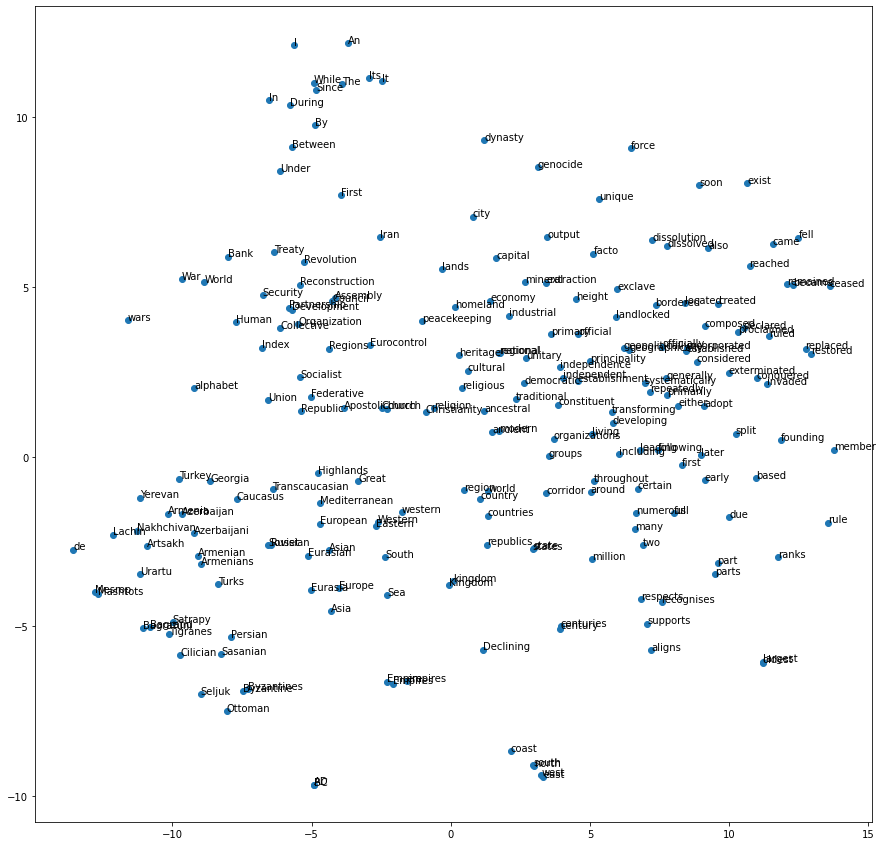

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.scatter(words_2d[:,0], words_2d[:,1])

for i, txt in enumerate(good_words):
    plt.annotate(txt, (words_2d[i,0], words_2d[i,1]))

### Task4: Do the same using cosine distance in TSNE

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(metric='cosine')
words_2d = tsne.fit_transform(list(map(lambda word: embeddings[word],good_words)))

c:\users\default.laptop-meq8135q\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\manifold\_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


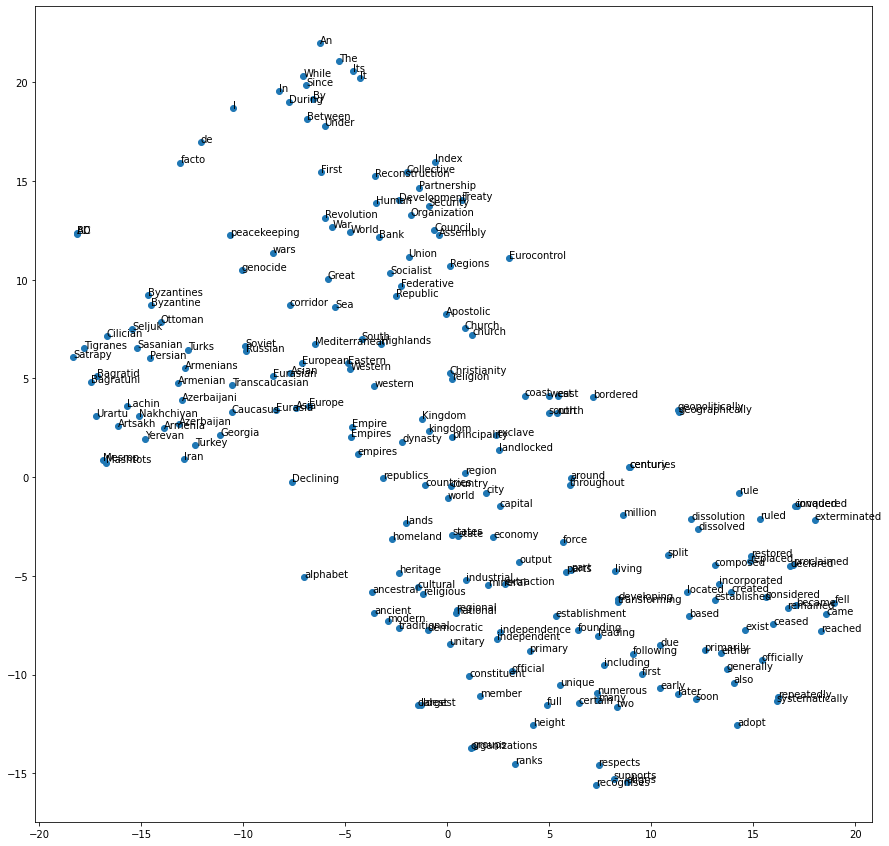

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.scatter(words_2d[:,0], words_2d[:,1])

for i, txt in enumerate(good_words):
    plt.annotate(txt, (words_2d[i,0], words_2d[i,1]))